In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../data/raw/synthetic_sales_data.csv'
sales_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(sales_data.head())

# Display basic information about the dataset
print("\nBasic information about the dataset:")
display(sales_data.info())

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
display(sales_data.describe())

# Check for missing values
print("\nMissing values in the dataset:")
display(sales_data.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows in the dataset:")
display(sales_data.duplicated().sum())



First few rows of the dataset:


,date_index,product_index,store_index,date,day_of_week,temperature,product,product_type,product_category,store,sales
0,0,0,0,2019-01-01,1,4.092157,Skis 1,Skis,Snow,Flagship,63.0
1,0,0,1,2019-01-01,1,4.092157,Skis 1,Skis,Snow,Suburbs,31.0
2,0,0,2,2019-01-01,1,4.092157,Skis 1,Skis,Snow,Outskirts,16.0
3,0,1,0,2019-01-01,1,4.092157,Skis 2,Skis,Snow,Flagship,63.0
4,0,1,1,2019-01-01,1,4.092157,Skis 2,Skis,Snow,Suburbs,30.0



Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21930 entries, 0 to 21929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_index        21930 non-null  int64  
 1   product_index     21930 non-null  int64  
 2   store_index       21930 non-null  int64  
 3   date              21930 non-null  object 
 4   day_of_week       21930 non-null  int64  
 5   temperature       21930 non-null  float64
 6   product           21930 non-null  object 
 7   product_type      21930 non-null  object 
 8   product_category  21930 non-null  object 
 9   store             21930 non-null  object 
 10  sales             21930 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 1.8+ MB


None


Summary statistics of the dataset:


,date_index,product_index,store_index,day_of_week,temperature,sales
count,21930.000000,21930.000000,21930.000000,21930.000000,21930.000000,21930.000000
mean,365.000000,4.500000,1.000000,2.995896,10.953547,32.491883
std,211.026137,2.872347,0.816515,1.997646,5.474899,21.532371
min,0.000000,0.000000,0.000000,0.000000,0.117647,3.000000
25%,182.000000,2.000000,0.000000,1.000000,5.962745,15.000000
50%,365.000000,4.500000,1.000000,3.000000,10.470588,26.000000
75%,548.000000,7.000000,2.000000,5.000000,16.258824,46.000000
max,730.000000,9.000000,2.000000,6.000000,19.427451,114.000000



Missing values in the dataset:


date_index          0
product_index       0
store_index         0
date                0
day_of_week         0
temperature         0
product             0
product_type        0
product_category    0
store               0
sales               0
dtype: int64


Number of duplicate rows in the dataset:


0


Distribution of numerical features:


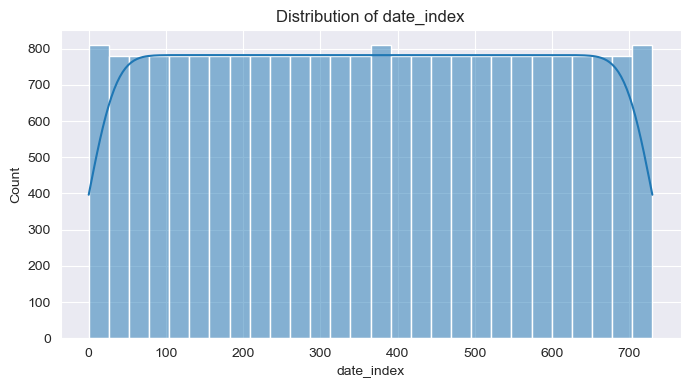

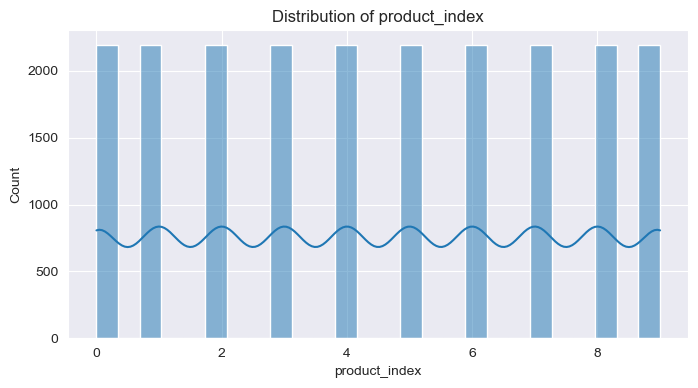

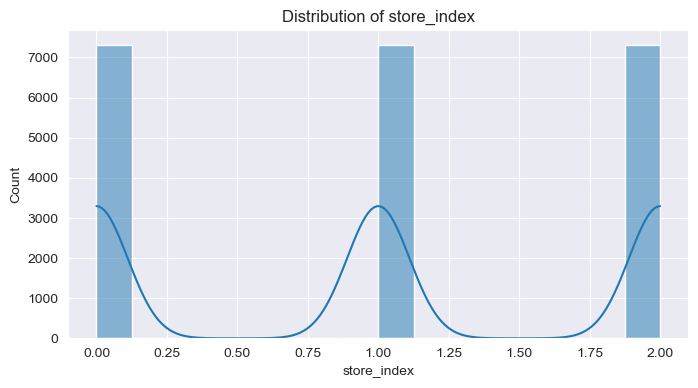

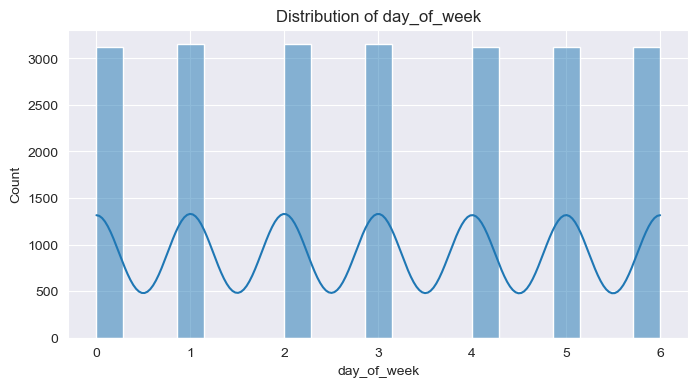

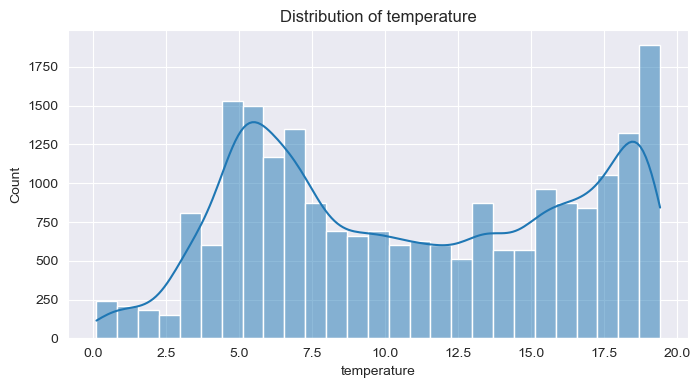

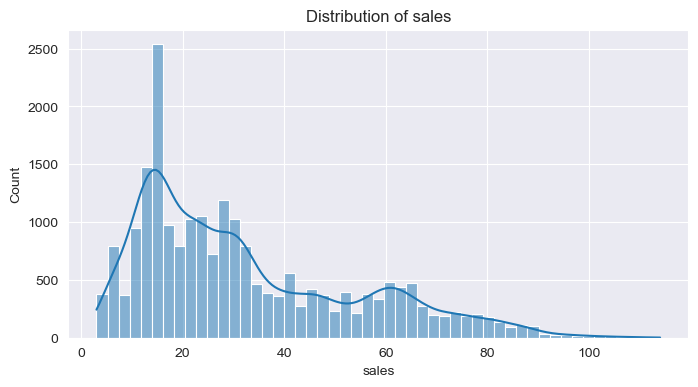

In [8]:
# Plotting the distribution of numerical features
numerical_features = sales_data.select_dtypes(include=['int64', 'float64']).columns

print("\nDistribution of numerical features:")
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(sales_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()






The histogram and KDE (Kernel Density Estimate) plot in the image provide insights into the distribution of the `sales` data.

1. **Skewed Distribution**: The sales data appears to be right-skewed, meaning that most of the sales values are clustered toward the lower end of the scale, with a long tail extending toward higher sales values. This indicates that lower sales values are more common, while higher sales values are less frequent.

2. **Peak at Lower Sales Values**: There is a prominent peak around the lower sales values, specifically between 10 and 30. This suggests that a large number of sales entries fall within this range.

3. **Few High Sales Instances**: The right tail of the distribution suggests that there are some instances of high sales, but these are relatively rare compared to the more frequent lower sales values.

4. **Potential Outliers**: The presence of values far to the right of the distribution could indicate potential outliers or extreme values in the sales data. These should be examined further to determine whether they represent valid data points or if they need to be handled (e.g., through transformation or removal).

Overall, this plot suggests that the majority of sales are relatively low, with a decreasing frequency of higher sales values.


Boxplots for numerical features to detect outliers:


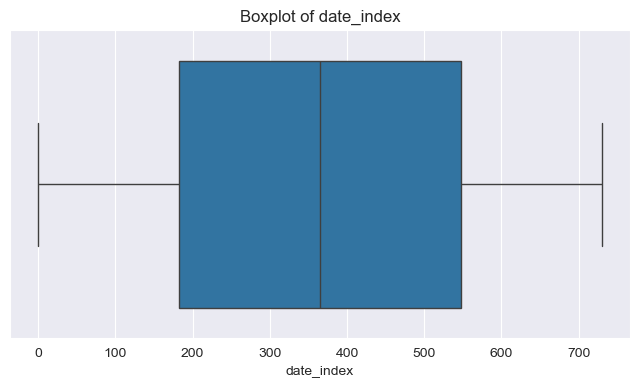

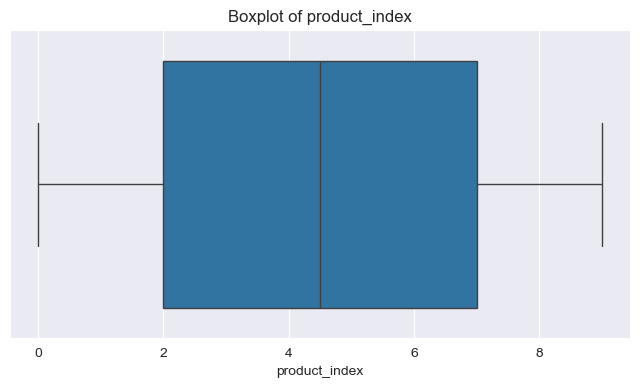

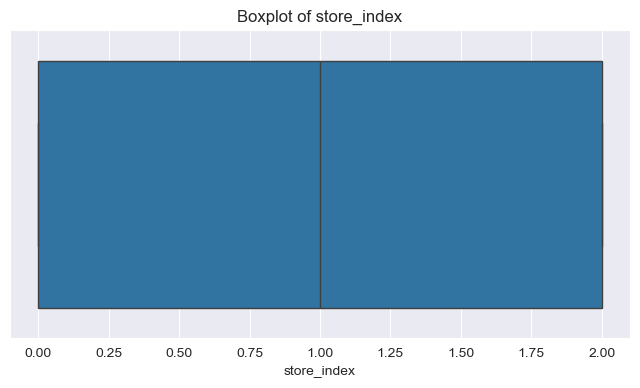

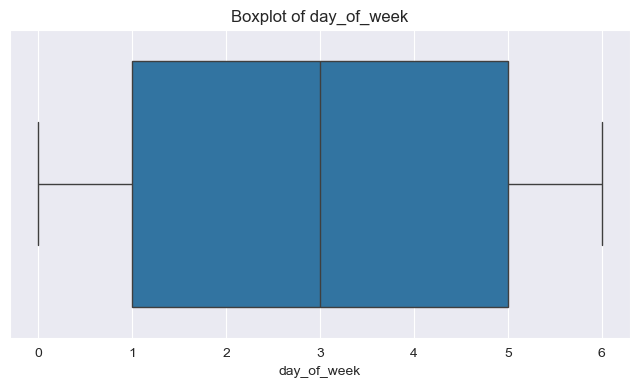

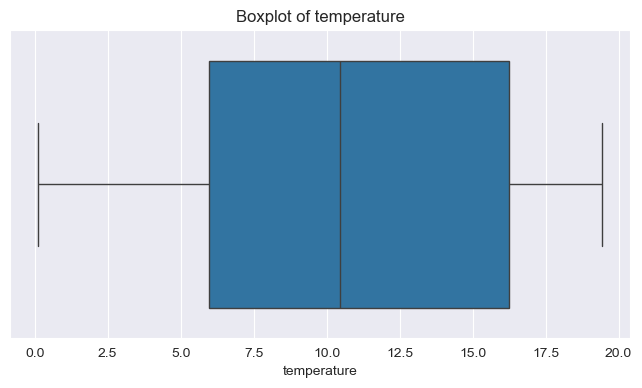

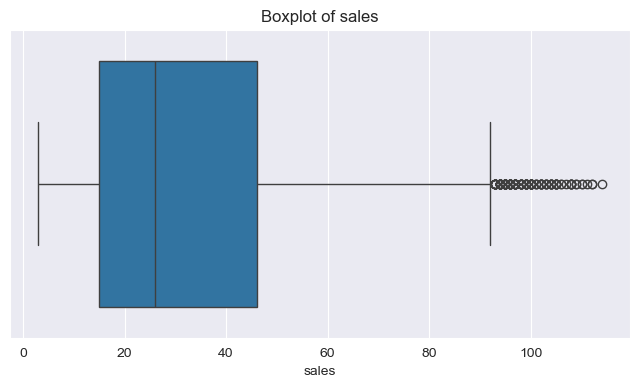

In [10]:
# Boxplot for numerical features to detect outliers
print("\nBoxplots for numerical features to detect outliers:")
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=sales_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

The boxplots in the image provide several insights into the distribution and potential outliers for each numerical feature in your sales dataset. Here's what each plot indicates:

1. **`date_index`**:
   - The boxplot shows a relatively uniform distribution, with no apparent outliers. The data spans evenly across the range, which suggests that the `date_index` is likely an evenly distributed numerical representation of dates.

2. **`product_index`**:
   - The distribution is relatively symmetric, with no outliers. This indicates that products are likely indexed in a way that spreads them evenly across the range.

3. **`store_index`**:
   - The `store_index` has a very narrow range, suggesting that this feature might represent a small number of categories (e.g., only two store types or locations). There are no outliers, and the distribution is quite uniform within its range.

4. **`day_of_week`**:
   - The `day_of_week` feature is also evenly distributed, with no outliers. This suggests that the sales data is collected across all days of the week without any particular day dominating the data.

5. **`temperature`**:
   - The `temperature` feature has a symmetrical distribution with no outliers. The data appears to be concentrated within a certain range, which is expected as temperature typically fluctuates within a specific range.

6. **`sales`**:
   - The `sales` feature has a right-skewed distribution with a significant number of outliers on the higher end. This suggests that while most sales values fall within a lower range, there are several instances of much higher sales, which are considered outliers in this context.

### Key Takeaways:
- **Uniform Distribution**: Several features like `date_index`, `product_index`, `store_index`, and `day_of_week` appear to have uniform distributions without outliers.
- **Outliers in Sales**: The `sales` feature has notable outliers on the higher end, which could represent either large transactions or special cases that deviate from typical sales.
- **Symmetry in Temperature**: The temperature feature is symmetrically distributed without outliers, indicating that the data is well within a normal range.

This analysis suggests that most features are well-behaved in terms of distribution, except for `sales`, which has some high-value outliers that might require further investigation or special handling in your modeling process.

In [5]:
# Plotting correlations between numerical features
print("\nCorrelation matrix of numerical features:")
plt.figure(figsize=(12, 8))
correlation_matrix = sales_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()




Correlation matrix of numerical features:


ValueError: could not convert string to float: '2019-01-01'

<Figure size 1200x800 with 0 Axes>


Count plots for categorical features:


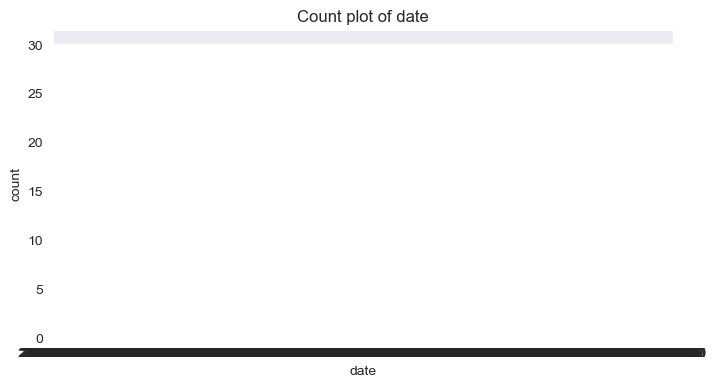

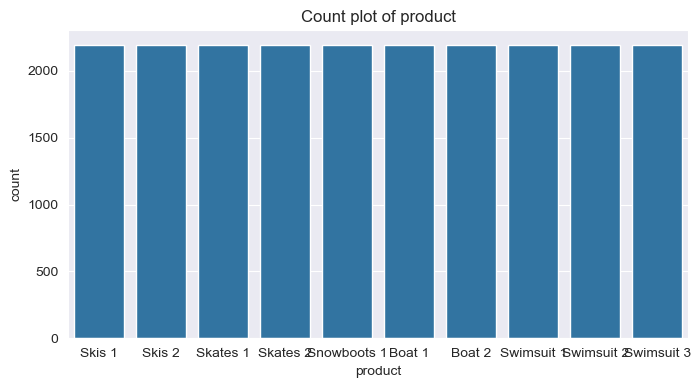

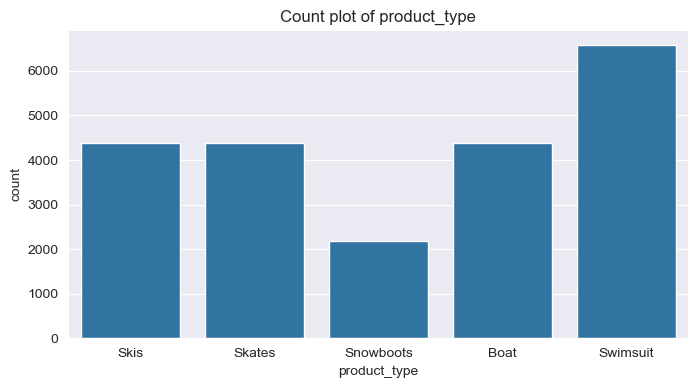

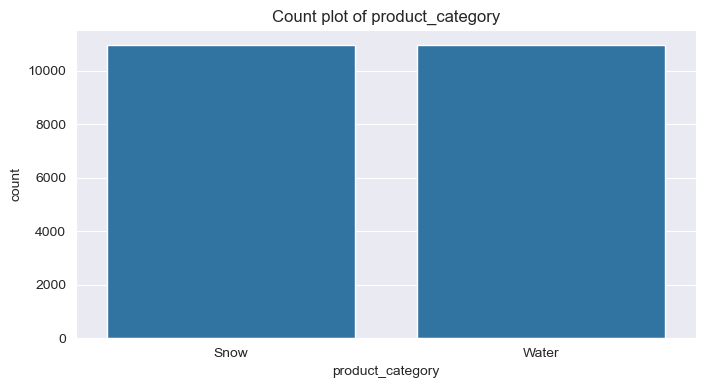

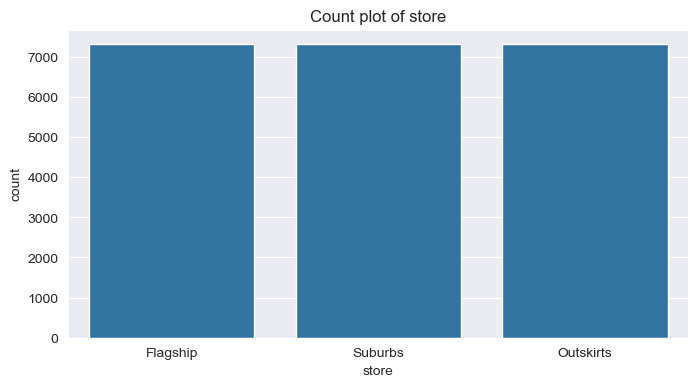

In [6]:
# Analyzing categorical features
categorical_features = sales_data.select_dtypes(include=['object', 'category']).columns

print("\nCount plots for categorical features:")
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=sales_data[feature])
    plt.title(f'Count plot of {feature}')
    plt.show()




Time series analysis of sales over time:


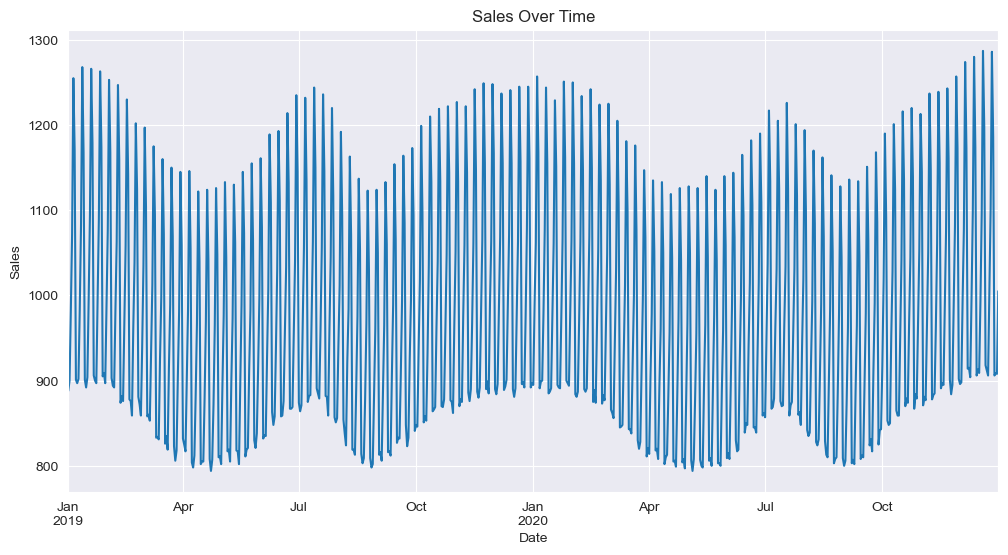

In [7]:
# Time series analysis if there is a date or time column
if 'date' in sales_data.columns:
    sales_data['date'] = pd.to_datetime(sales_data['date'])
    print("\nTime series analysis of sales over time:")
    plt.figure(figsize=(12, 6))
    sales_data.groupby('date').sum()['sales'].plot()
    plt.title('Sales Over Time')
    plt.ylabel('Sales')
    plt.xlabel('Date')
    plt.show()

The time series analysis shown in the plot provides several key insights about the sales data over time:

1. **Seasonality**: The plot exhibits a clear seasonal pattern, with sales values rising and falling in a regular, repeating manner throughout the year. This indicates that sales are influenced by seasonal factors, with peaks and troughs likely corresponding to specific times of the year (e.g., holidays, summer, winter).

2. **Trend**: There is an overall upward trend in sales, especially noticeable toward the end of the time series. This suggests that, despite the seasonal fluctuations, there is a general increase in sales over time.

3. **Cyclical Behavior**: The repeating cycles of peaks and troughs suggest that certain periods consistently experience higher or lower sales. For example, sales appear to peak around mid-year and decline afterward, with another peak later in the year.

4. **Yearly Comparison**: The plot seems to span across multiple years, allowing for comparison between the same periods in different years. The consistency of the seasonal patterns across years strengthens the evidence for seasonality in the data.

### Key Takeaways:
- **Seasonal Planning**: The clear seasonality in the data suggests that any forecasting or planning efforts should account for these regular fluctuations.
- **Growth**: The upward trend indicates that sales are generally increasing over time, which could be due to factors such as market expansion, increased customer base, or successful marketing strategies.
- **Time-Sensitive Strategies**: Understanding when peaks and troughs occur can help in strategizing marketing, inventory management, and other operational aspects to align with these predictable changes in sales.

This time series analysis suggests that your sales data is heavily influenced by seasonal patterns, with a positive overall trend in sales over the analyzed period.


Correlation heatmap of numerical features:


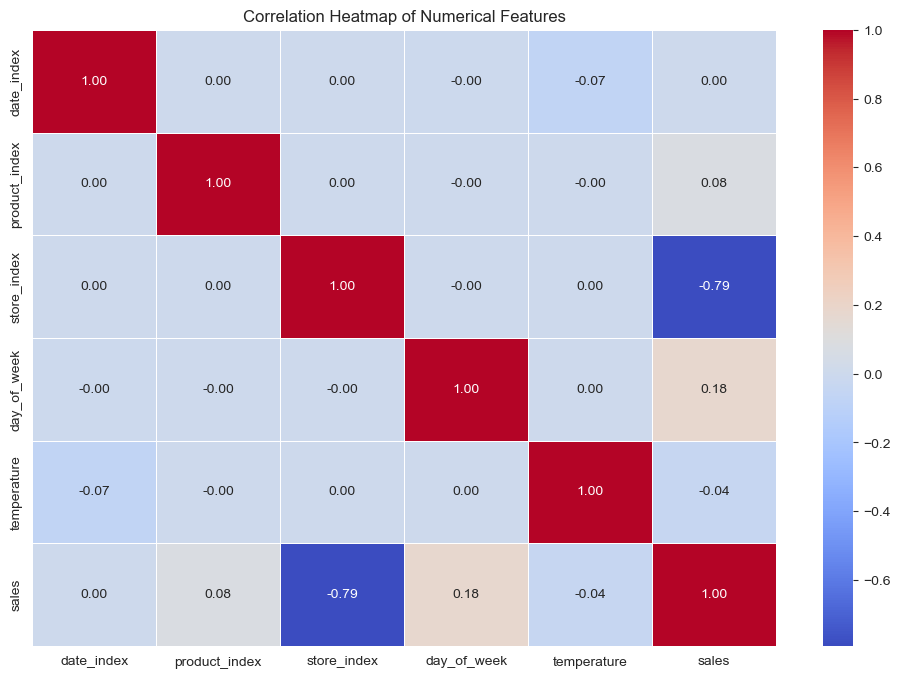

In [11]:
# Correlation heatmap for numerical features
print("\nCorrelation heatmap of numerical features:")
plt.figure(figsize=(12, 8))
correlation_matrix = sales_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


The correlation heatmap above provides insights into the relationships between the numerical features in our sales dataset. 

### Key Observations:

1. **Negative Correlation between `store_index` and `sales` (-0.79)**:
   - There is a strong negative correlation between `store_index` and `sales`, which suggests that certain stores (likely indexed in a specific way) consistently experience lower sales compared to others. This could be due to various factors such as location, store size, or customer demographics.

2. **Positive Correlation between `day_of_week` and `sales` (0.18)**:
   - There is a weak positive correlation between `day_of_week` and `sales`. This indicates that sales slightly increase or decrease depending on the day of the week, though the effect is not very strong. Certain days may see higher sales, such as weekends or specific weekdays.

3. **Weak or No Correlation for Other Features**:
   - Features like `date_index`, `product_index`, and `temperature` show very weak or no correlation with `sales`. This suggests that these features do not have a strong linear relationship with the sales variable in this dataset.
   - For example, the correlation between `temperature` and `sales` is almost zero (-0.04), indicating that temperature does not significantly impact sales in this dataset.

4. **Strong Internal Correlation**:
   - Features like `date_index`, `product_index`, and `store_index` have a perfect correlation with themselves, as expected (1.00).

### Interpretation:

- **Impactful Features**: The `store_index` is a highly impactful feature with a strong negative correlation with `sales`. This might suggest that certain stores are underperforming, which could be an area for further investigation.
- **Day of the Week Influence**: The `day_of_week` feature also shows some influence on sales, albeit weak. Depending on the business context, this might be worth exploring further to see if promotional activities or store hours could be adjusted to optimize sales on certain days.
- **Irrelevant Features**: Features like `temperature`, `date_index`, and `product_index` appear to have little to no direct impact on sales in this particular dataset. These might not be as useful for predictive modeling unless they have non-linear effects that are not captured by simple correlation.
